In [27]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()
traffic.head()
traffic.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

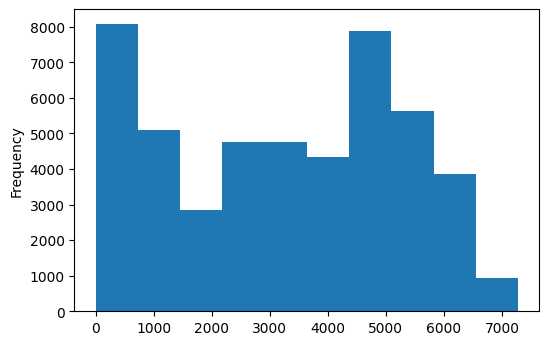

In [29]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [30]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [31]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour>=19) | (traffic['date_time'].dt.hour <7)]
print(night.shape)                  

(23877, 9)
(24327, 9)


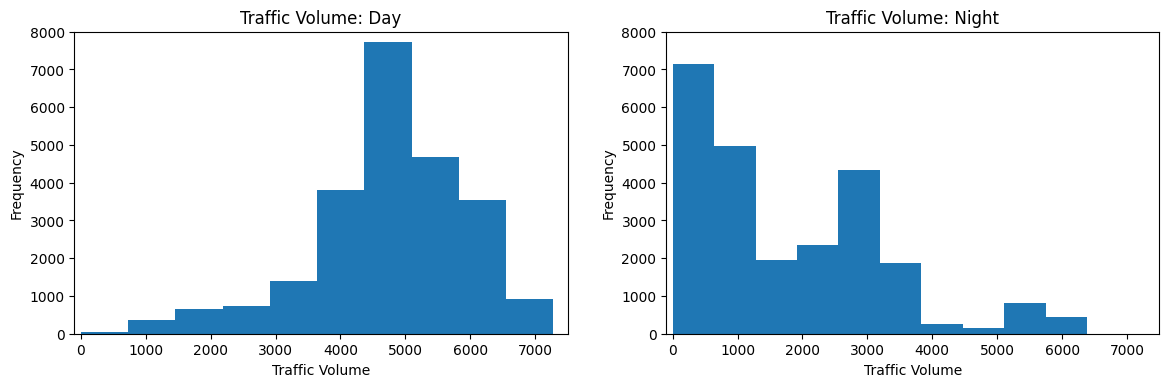

In [32]:
plt.figure(figsize=(14,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

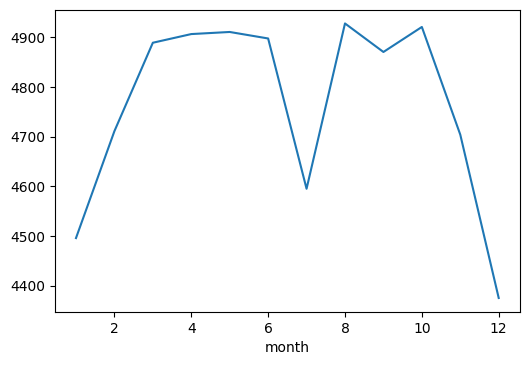

In [33]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()




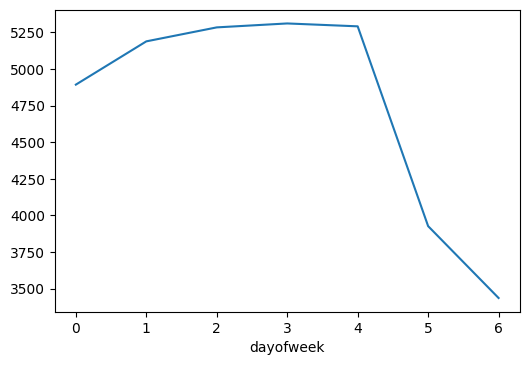

In [34]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()



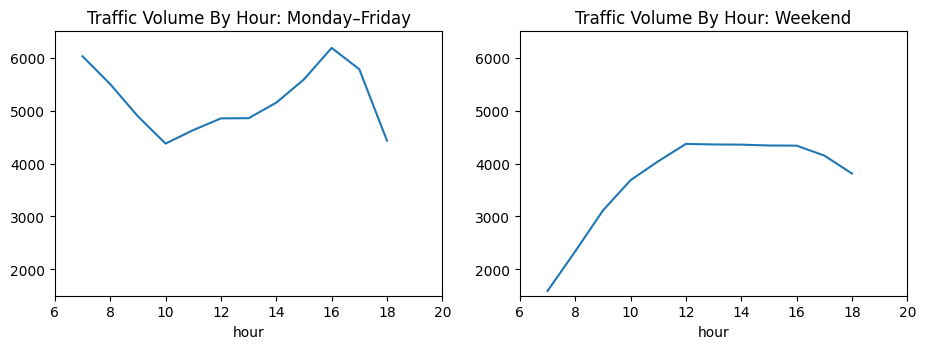

In [35]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

In [37]:
day.copy().corr()[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
month,-0.022337,0.222072,0.001176,0.026768,0.000595
dayofweek,-0.416453,0.000188,-0.009683,-0.008814,-0.041980
hour,0.172704,0.162691,0.008279,0.003923,0.023685


(220.0, 350.0)

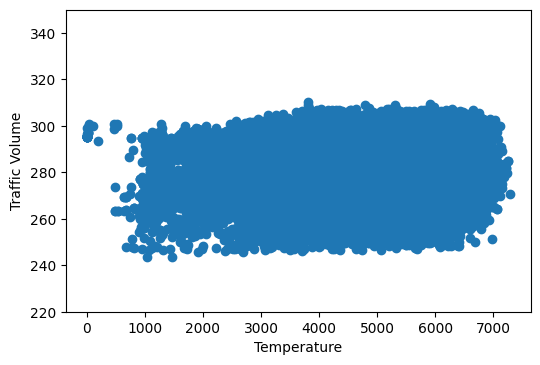

In [38]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.ylim(220, 350)

In [39]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


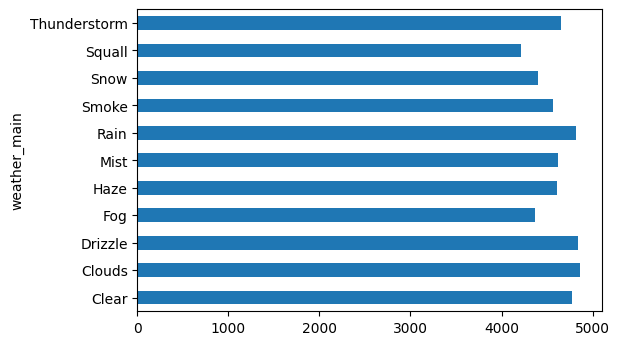

In [40]:
by_weather_main['traffic_volume'].plot.barh()